In [286]:
import numpy as np
import os
import json
from PIL import ImageColor, Image
import cv2
import matplotlib.pyplot as plt
import glob
import random

Load the json data into dict

In [9]:
# f = open('./Semantic segmentation dataset/classes.json')
# classes = json.load(f)

In [10]:
# class_and_color = {classs['title']: classs['color'] for classs in classes['classes']}
# class_and_color['Land'] = class_and_color['Land (unpaved area)'] # Rename 'Land (unpaved area)' -> 'Land'
# del class_and_color['Land (unpaved area)']      

In [317]:
# Copied from the Kaggle Content section -> do not use the provied json file 
hex_classes = {'Building': '#3C1098',
'Land': '#8429F6',
'Road': '#6EC1E4',
'Vegetation': '#FEDD3A',
'Water': '#E2A929',
'Unlabeled': '#9B9B9B'}

Convert the Hex colors to RGB

In [316]:
class_color_RGB = {classs:ImageColor.getcolor(hex_classes[classs], "RGB") for classs in hex_classes}
class_color_RGB

{'Building': (60, 16, 152),
 'Land': (132, 41, 246),
 'Road': (110, 193, 228),
 'Vegetation': (254, 221, 58),
 'Water': (226, 169, 41),
 'Unlabeled': (155, 155, 155)}

Load the images from file

In [271]:
# Uniform dimensions for all images & masks 
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

In [272]:
images_path = glob.glob('./Semantic segmentation dataset/**/images/*')

In [273]:
images = []
for image in images_path:
    im = cv2.imread(image)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (IMAGE_HEIGHT,IMAGE_WIDTH))
    images.append(im)
    
images_array = np.array(images)

In [274]:
masks_path = glob.glob('./Semantic segmentation dataset/**/masks/*')

In [275]:
masks = []
for mask in masks_path:
    ma = cv2.imread(mask)
    ma = cv2.cvtColor(ma, cv2.COLOR_BGR2RGB)
    ma = cv2.resize(ma, (IMAGE_HEIGHT,IMAGE_WIDTH))
    masks.append(ma)
    
masks_array = np.array(masks)

Plot an image and mask

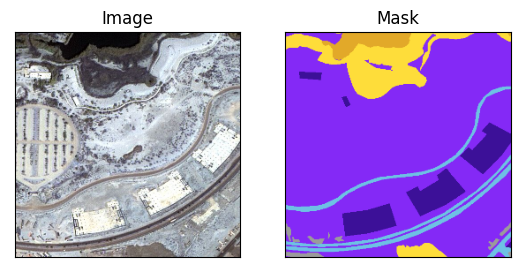

In [304]:
fig, (ax1, ax2) = plt.subplots(1, 2)
rand_index = np.random.randint(low=0, high=images_array.shape[0])
ax1.imshow(images_array[rand_index])
ax1.set_title("Image")
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.imshow(masks_array[rand_index])
ax2.set_title("Mask")
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
plt.show()

Replace the RGB values with single value

In [318]:
class_color_RGB['Building']

(60, 16, 152)

In [321]:
masks_array[0].shape

(256, 256, 3)

In [322]:
m1 = masks_array[0]

In [374]:
m1.shape

(256, 256, 3)

In [384]:
m1[:,:,1].shape

(256, 256)

In [387]:
# row 0, col 0, R,G,B
m1[0,0,0], m1[0,0,1], m1[0,0,2]

(132, 41, 246)

In [392]:
m1[0,0] == (132, 41, 246)

array([ True,  True,  True])

In [393]:
np.where(m1 == (132, 41, 246))

(array([  0,   0,   0, ..., 255, 255, 255], dtype=int64),
 array([  0,   0,   0, ..., 255, 255, 255], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [337]:
z_arr = np.zeros((m1.shape[0], m1.shape[1]))

In [406]:
# layers, rows, columns
r = np.ones((5,5))
g = np.ones((5,5))
b = np.ones((5,5))
mat = np.dstack([r,g,b])

In [407]:
# mat[0][0][0], mat[1][0][0], mat[2][0][0] = (132, 41, 246)
mat.shape

(5, 5, 3)

In [362]:
np.where(mat == (132, 41, 246))

(array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))